<a href="https://colab.research.google.com/github/Bibimbap27/Bibimbap27/blob/main/SalesAnalysis_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os 

In [ ]:
###merging 12 months of sales data into a single file
all_months_data = pd.DataFrame()
files = [file for file in os.listdir('/content/Sales_Data')]
for file in files:
  df = pd.read_csv("/content/Sales_Data/" +file)
  all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv",index=False)

all_data = pd.read_csv("/content/all_data.csv")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [ ]:
# What was the best month for sales? How much was earned that month??

What was the best month for sales? How much was earned that month??

In [ ]:
#drop rows of NAN

nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [ ]:
all_data  = all_data[all_data['Order Date'].str[0:2] != "Or"]


In [ ]:
all_data['Month']  = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

ValueError: ignored

In [ ]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Sales'] =all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

ValueError: ignored

In [ ]:
results = all_data.groupby('Month').sum()
all_data.groupby('Month').sum().sort_values(by = ['Sales'],ascending=False )
results = all_data.groupby('Month').sum()

KeyError: ignored

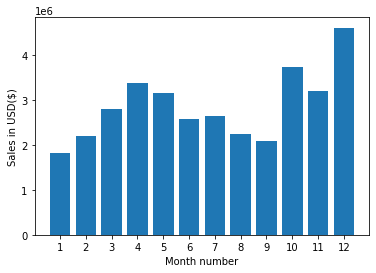

In [ ]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')
plt.show()

Question #2: What city sold the most product??

In [ ]:
def get_city(add):
  return add.split(',')[1]

def get_state(add):
  return add.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + " " + get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin TX
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin TX
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin TX
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco CA
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco CA


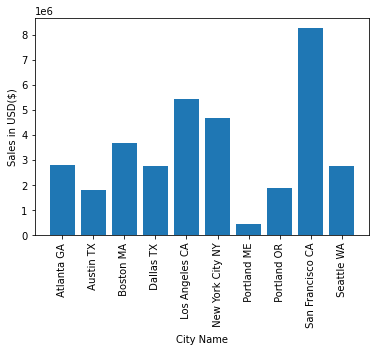

In [ ]:
results =  all_data.groupby('City').sum()
City = [city for city,df in all_data.groupby('City')]
plt.bar(City,results['Sales'])
plt.xticks(City,rotation='vertical')
plt.ylabel('Sales in USD($)')
plt.xlabel('City Name')
plt.show()

Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin TX
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin TX
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin TX
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco CA
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco CA


In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour

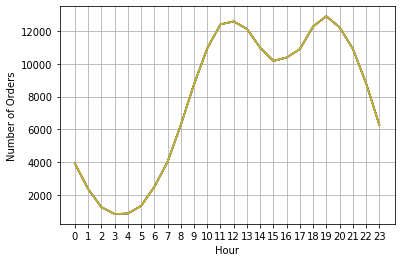

In [ ]:
hours = [hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

Question #4 :  What products are most often sold together?

In [ ]:
df= all_data[all_data['Order ID'].duplicated(keep=False)]  